In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_base-ensure")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[4]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
    except IndexError:
        print('Index error', key)
     

Cannot find file for VGP203_E5
Cannot find file for VGP302_E5
Cannot find file for VGP403_B1
Index error VGP506_E5
Cannot find file for VGP506_E6
Index error VGP509_E4


In [4]:
# cell_data['VGP203_C3']['empty_lick_snips_all']

In [5]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)
        
        


In [6]:
cell_data['VGP118_B1'].keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'empty_lick_snips_all', 'df_responsive', 'session'])

In [7]:
PR_B1_licks_act=[]
PR_B1_licks_inh=[]

PR_B2_licks_act=[]
PR_B2_licks_inhib=[]

PR_B3_licks_act=[]
PR_B3_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='B1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_B1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='B2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_B2_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C2_licks_nonres.append(np.mean(snips_non, axis=0))
    
    elif d['diet']=='PR' and d['session']=='B3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_B3_licks_act.append(np.mean(lick_snips, axis=0))
        PR_B3_licks_inhib.append(np.mean(snips_in, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C3_licks_nonres.append(np.mean(snips_non, axis=0))

#Filtering out empty arrays        
# PR_C2_licks_act_f=[]        
# for animal in PR_C2_licks_act: 
#     if not np.isnan(animal).any(): 
#         PR_C2_licks_act_f.append(animal)
        
# PR_C1_licks_inh_f=[]        
# for animal in PR_C1_licks_inh: 
#     if not np.isnan(animal).any(): 
#         PR_C1_licks_inh_f.append(animal)

        
        

PR_base=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Baseline':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_base.append(np.mean(lick_snips, axis=0))

        
        
        
# PR_Cas_f=[]        
# for animal in PR_Cas: 
#     if not np.isnan(animal).any(): 
#         PR_Cas_f.append(animal)
        


In [8]:
# PR_M1_licks_act=[]
# PR_M2_licks_act=[]
# PR_M3_licks_act=[]
# PR_M3_licks_inhib=[]


# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='PR' and d['session']=='M1':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         PR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
#     elif d['diet']=='PR' and d['session']=='M2':
#         animal.append(d['animal'])
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         PR_M2_licks_act.append(np.mean(lick_snips, axis=0))       
    
#     elif d['diet']=='PR' and d['session']=='M3':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         lick_snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
#         PR_M3_licks_act.append(np.mean(lick_snips, axis=0))
#         PR_M3_licks_inhib.append(np.mean(lick_snips_in, axis=0))
        
# print(animal)
# PR_M2_licks_act_f=[]        
# for animal in PR_M2_licks_act: 
#     if not np.isnan(animal).any(): 
#         PR_M2_licks_act_f.append(animal)
        
# PR_M3_licks_inhib_f=[]
# for animal in PR_M3_licks_inhib: 
#     if not np.isnan(animal).any(): 
#         PR_M3_licks_inhib_f.append(animal)
        
        
        
# PR_malt=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='PR' and d['solution']=='Malt':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         PR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
# PR_malt_f=[]        
# for animal in PR_malt: 
#     if not np.isnan(animal).any(): 
#         PR_malt_f.append(animal)
        
        


In [9]:
NR_B1_licks_act=[]
NR_B2_licks_act=[]
NR_B3_licks_act=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='B1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_B1_licks_act.append(np.mean(lick_snips, axis=0))

        
    elif d['diet']=='NR' and d['session']=='B2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_B2_licks_act.append(np.mean(lick_snips, axis=0))

    
    elif d['diet']=='NR' and d['session']=='B3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_B3_licks_act.append(np.mean(lick_snips, axis=0))




NR_B2_licks_act_f=[]        
for animal in NR_B2_licks_act: 
    if not np.isnan(animal).any(): 
        NR_B2_licks_act_f.append(animal)
        
        
NR_base=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Baseline':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_base.append(np.mean(lick_snips, axis=0))
        
        
        
# NR_cas_f=[]        
# for animal in NR_cas: 
#     if not np.isnan(animal).any(): 
#         NR_cas_f.append(animal)



C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [10]:
# NR_M1_licks_act=[]
# NR_M2_licks_act=[]
# NR_M3_licks_act=[]


# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='NR' and d['session']=='M1':
#         lick_snips1=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         NR_M1_licks_act.append(np.mean(lick_snips1, axis=0))
        
#     elif d['diet']=='NR' and d['session']=='M2':
#         animal.append(d['animal'])
#         lick_snips2=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         NR_M2_licks_act.append(np.mean(lick_snips2, axis=0))

#     elif d['diet']=='NR' and d['session']=='M3':
#         animal.append(d['animal'])
#         lick_snips3=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         NR_M3_licks_act.append(np.mean(lick_snips3, axis=0))

        
# NR_malt=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='NR' and d['solution']=='Malt':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         NR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
# NR_malt_f=[]        
# for animal in NR_malt: 
#     if not np.isnan(animal).any(): 
#         NR_malt_f.append(animal)


Text(0.5, 1.0, 'Baseline-NR')

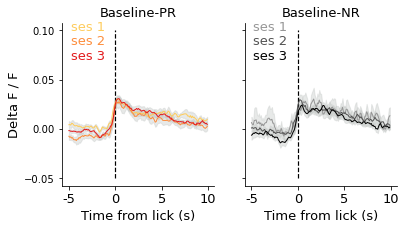

In [11]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], PR_B1_licks_act, linecolor="#fecc5c")

tp.shadedError(ax[0], PR_B2_licks_act, linecolor="#fd8d3c")

tp.shadedError(ax[0], PR_B3_licks_act, linecolor="#e31a1c")



tp.shadedError(ax[1], NR_B1_licks_act, linecolor="#969696")

tp.shadedError(ax[1], NR_B2_licks_act_f, linecolor="#525252")

tp.shadedError(ax[1], NR_B3_licks_act, linecolor="black")




ax[0].text(2, 0.1, "ses 1",color='#fecc5c', size=13)
ax[0].text(2, 0.085, "ses 2", color="#fd8d3c",size=13)
ax[0].text(2, 0.07, "ses 3", color="#e31a1c",size=13)

ax[1].text(2, 0.1, "ses 1",color='#969696', size=13)
ax[1].text(2, 0.085, "ses 2", color="#525252",size=13)
ax[1].text(2, 0.07, "ses 3", color="black",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('Baseline-PR', size=13)
ax[1].set_title('Baseline-NR', size=13)



# f.savefig("..//output//PR_licksnips_casmalt.png")


In [12]:
# PR_ensure=[]
# NR_ensure=[]
# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='PR' and d['solution']=='Ensure':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         PR_ensure.append(np.mean(lick_snips, axis=0))
#     elif d['diet']=='NR' and d['solution']=='Ensure':
#         lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
#         NR_ensure.append(np.mean(lick_snips, axis=0))
        
        
# PR_ensure_f=[]        
# for animal in PR_ensure: 
#     if not np.isnan(animal).any(): 
#         PR_ensure_f.append(animal)

### making heatmap of all cells 

In [227]:
from itertools import chain

snips_PR_base=[]
act_PR_base=[]
in_PR_base=[]
empty_PR_base=[]


snips_NR_base=[]
act_NR_base=[]
in_NR_base=[]
empty_NR_base=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='B3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])

        for cell in snips:
            snips_PR_base.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_base.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_base.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_base.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='B3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_NR_base.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_base.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_base.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_NR_base.append(np.mean(cell, axis=0))
            


            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        

len(snips_PR_base)

379

In [228]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

## Heatmaps all cells NR and PR Baseline

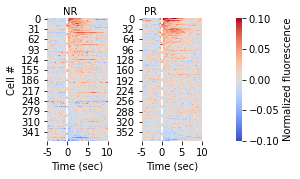

In [229]:
f, ax = plt.subplots(figsize=(4.5,2.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.8,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_base,50,70)

y2 = sort_by_activity(snips_PR_base,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "NR")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "PR")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
# ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_baseline.png")

## Ensure sessions

In [201]:
from itertools import chain

snips_PR_en=[]
act_PR_en=[]
in_PR_en=[]
empty_PR_en=[]


snips_NR_en=[]
act_NR_en=[]
in_NR_en=[]
empty_NR_en=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='E3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])

        for cell in snips:
            snips_PR_en.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_en.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_en.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_en.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='E3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_NR_en.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_en.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_en.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_NR_en.append(np.mean(cell, axis=0))
            


            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        

len(snips_NR_en)

355

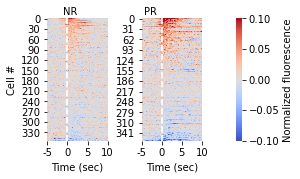

In [230]:
f, ax = plt.subplots(figsize=(4.5,2.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.8,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_en,50,70)

y2 = sort_by_activity(snips_PR_en,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "NR")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "PR")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
# ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_diet1.png")

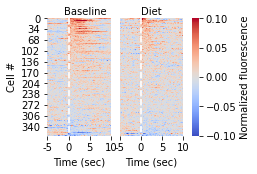

In [203]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_base,50,70)

y2 = sort_by_activity(snips_NR_en,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Baseline")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(50,-10, "Diet")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_ensure_NR.png")

## fig - Signal NR and PR

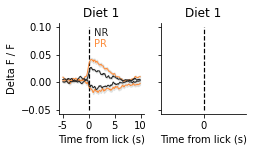

In [224]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

# tp.shadedError(ax[1], act_NR_base, linecolor="#252525")
# tp.shadedError(ax[1], in_NR_base, linecolor="#252525")

# tp.shadedError(ax[0], act_PR_base, linecolor="#fd8d3c")
# tp.shadedError(ax[0], in_PR_base, linecolor="#fd8d3c")


tp.shadedError(ax[0], act_PR_en, linecolor="#fd8d3c")
tp.shadedError(ax[0], in_PR_en, linecolor="#fd8d3c")


tp.shadedError(ax[0], act_NR_en, linecolor="#252525")
tp.shadedError(ax[0], in_NR_en, linecolor="#252525")


ax[0].text(60, 0.085, "NR",color='#252525')
ax[0].text(60, 0.065, "PR", color="#fd8d3c")

# ax[1].text(60, 0.085, "NR",color='#252525')
# ax[1].text(60, 0.065, "PR", color="#fd8d3c")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Diet 1')
ax[1].set_title('Diet 1')


f.savefig("..//output//Singal_Ensure_groupe1.png")

## Signal fig Baseline and diet 1

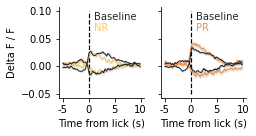

In [231]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NR_en, linecolor="#fecc5c")
tp.shadedError(ax[0], in_NR_en, linecolor="#fecc5c")

tp.shadedError(ax[0], act_NR_base, linecolor="#252525")
tp.shadedError(ax[0], in_NR_base, linecolor="#252525")


tp.shadedError(ax[1], act_PR_en, linecolor="#fd8d3c")
tp.shadedError(ax[1], in_PR_en, linecolor="#fd8d3c")


tp.shadedError(ax[1], act_PR_base, linecolor="#252525")
tp.shadedError(ax[1], in_PR_base, linecolor="#252525")


ax[0].text(60, 0.065, "NR",color='#fecc5c')
ax[0].text(60, 0.085, "Baseline", color="#252525")

ax[1].text(60, 0.065, "PR",color='#fd8d3c')
ax[1].text(60, 0.085, "Baseline", color="#252525")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


# ax[0].set_title('Ensure')
# ax[1].set_title('PR')


f.savefig("..//output//Singal_Ensure1.png")

## Pie Charts

In [241]:
cols = ["data", "base", "ensure"]
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['base']=len(act_PR_base),len(in_PR_base),len(snips_PR_base)-(len(act_PR_base)+len(in_PR_base))
df_resp_PR['ensure']=len(act_PR_en),len(in_PR_en),len(snips_PR_en)-(len(act_PR_en)+len(in_PR_en))

df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['base_pct'] = df_resp_PR['base'] / df_resp_PR['base'].sum() * 100
df_resp_PR['ensure_pct'] = df_resp_PR['ensure'] / df_resp_PR['ensure'].sum() * 100

# Transpose the DataFrame
df_resp_PR.set_index('data', inplace=True)
df_resp_PR = df_resp_PR.T


df_resp_PR

data,lick_activated,lick_inhibited,non-responsive
base,181.000000,57.000000,141.000000
ensure,139.000000,63.000000,162.000000
base_pct,47.757256,15.039578,37.203166
ensure_pct,38.186813,17.307692,44.505495


In [242]:
cols = ["data", "base", "ensure"]
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['base']=len(act_NR_base),len(in_NR_base),len(snips_NR_base)-(len(act_NR_base)+len(in_NR_base))
df_resp_NR['ensure']=len(act_NR_en),len(in_NR_en),len(snips_NR_en)-(len(act_NR_en)+len(in_NR_en))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['base_pct'] = df_resp_NR['base'] / df_resp_NR['base'].sum() * 100
df_resp_NR['ensure_pct'] = df_resp_NR['ensure'] / df_resp_NR['ensure'].sum() * 100

# Transpose the DataFrame
df_resp_NR.set_index('data', inplace=True)
df_resp_NR = df_resp_NR.T


df_resp_NR

data,lick_activated,lick_inhibited,non-responsive
base,195.000000,69.000000,105.000000
ensure,132.000000,69.000000,154.000000
base_pct,52.845528,18.699187,28.455285
ensure_pct,37.183099,19.436620,43.380282


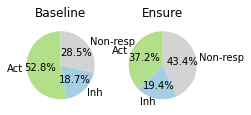

In [235]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NR.base[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NR.ensure[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Baseline" )
ax2.set_title("Ensure")

f.savefig("..//output//Pie_em_NR.png")




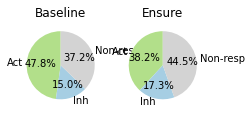

In [236]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_PR.base[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PR.ensure[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Baseline" )
ax2.set_title("Ensure")

f.savefig("..//output//Pie_em_PR.png")


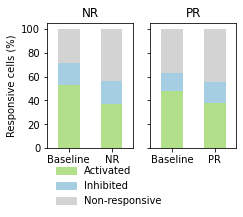

In [245]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
    
ax[0].set_title('NR')
ax[1].set_title('PR')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")
ax[0].set_xticklabels(['Baseline', 'NR'], rotation=0)
ax[1].set_xticklabels(['Baseline', 'PR'], rotation=0)


# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.3))





f.savefig("..//output//Stack_Ensure.png")

# NRPR and PRNR

In [246]:
from itertools import chain

snips_PRNR_en=[]
act_PRNR_en=[]
in_PRNR_en=[]
empty_PRNR_en=[]

snips_NRPR_en=[]
act_NRPR_en=[]
in_NRPR_en=[]
empty_NRPR_en=[]



animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='E6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])


        for cell in snips:
            snips_PRNR_en.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_en.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_en.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_en.append(np.mean(cell, axis=0))
            
            
    elif d['diet']=='NRPR' and d['session']=='E6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_en.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_en.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_en.append(np.mean(cell, axis=0))
  

            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        

animal

['VGP118',
 'VGP203',
 'VGP302',
 'VGP306',
 'VGP307',
 'VGP402',
 'VGP505',
 'VGP509']

## heatmaps

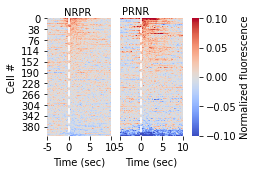

In [247]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NRPR_en,50,70)

y2 = sort_by_activity(snips_PRNR_en,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "NRPR")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "PRNR")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_ensure2.png")

## Signal

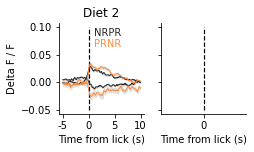

In [259]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


tp.shadedError(ax[0], act_NRPR_en, linecolor="#252525")
tp.shadedError(ax[0], in_NRPR_en, linecolor="#252525")


tp.shadedError(ax[0], act_PRNR_en, linecolor="#fd8d3c")
tp.shadedError(ax[0], in_PRNR_en, linecolor="#fd8d3c")


ax[0].text(60, 0.065, "PRNR", color="#fd8d3c")

ax[0].text(60, 0.085, "NRPR", color="#252525")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Diet 2')
# ax[1].set_title('PRNR')


f.savefig("..//output//Singal_ensure2.png")

## Pie Chars

In [109]:
cols = ["data", "ensure"]
df_resp_PRNR = pd.DataFrame(columns=cols)
df_resp_PRNR['ensure']=len(act_PRNR_en),len(in_PRNR_en),len(snips_PRNR_en)-(len(act_PRNR_en)+len(in_PRNR_en))

df_resp_PRNR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PRNR['ensure_pct_2'] = df_resp_PRNR['ensure'] / df_resp_PRNR['ensure'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PRNR.set_index('data', inplace=True)
# df_resp_PRNR = df_resp_PRNR.T

df_resp_PRNR

data,lick_activated,lick_inhibited,non-responsive
ensure,145.000000,70.000000,117.000000
ensure_pct_2,43.674699,21.084337,35.240964


In [101]:
cols = ["data", "ensure"]
df_resp_NRPR = pd.DataFrame(columns=cols)
df_resp_NRPR['ensure']=len(act_NRPR_en),len(in_NRPR_en),len(snips_NRPR_en)-(len(act_NRPR_en)+len(in_NRPR_en))

df_resp_NRPR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NRPR['ensure_pct_2'] = df_resp_NRPR['ensure'] / df_resp_NRPR['ensure'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NRPR.set_index('data', inplace=True)
# df_resp_NRPR= df_resp_NRPR.T

df_resp_NRPR

,data,ensure,ensure_pct_2
0,lick_activated,135,32.766990
1,lick_inhibited,81,19.660194
2,non-responsive,196,47.572816


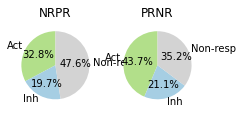

In [106]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NRPR.ensure[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PRNR.ensure[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("NRPR" )
ax2.set_title("PRNR")

f.savefig("..//output//Pie_ensure2.png")

In [260]:
cols = ["data", "base", "ensure","ensure2"]
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['base']=len(act_NR_base),len(in_NR_base),len(snips_NR_base)-(len(act_NR_base)+len(in_NR_base))
df_resp_NR['ensure']=len(act_NR_en),len(in_NR_en),len(snips_NR_en)-(len(act_NR_en)+len(in_NR_en))
df_resp_NR['ensure2']=len(act_NRPR_en),len(in_NRPR_en),len(snips_NRPR_en)-(len(act_NRPR_en)+len(in_NRPR_en))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['base_pct'] = df_resp_NR['base'] / df_resp_NR['base'].sum() * 100
df_resp_NR['ensure_pct'] = df_resp_NR['ensure'] / df_resp_NR['ensure'].sum() * 100
df_resp_NR['ensure_pct2'] = df_resp_NR['ensure2'] / df_resp_NR['ensure2'].sum() * 100

# Transpose the DataFrame
df_resp_NR.set_index('data', inplace=True)
df_resp_NR = df_resp_NR.T


df_resp_NR

data,lick_activated,lick_inhibited,non-responsive
base,195.000000,69.000000,105.000000
ensure,132.000000,69.000000,154.000000
ensure2,135.000000,81.000000,196.000000
base_pct,52.845528,18.699187,28.455285
ensure_pct,37.183099,19.436620,43.380282
ensure_pct2,32.766990,19.660194,47.572816


In [261]:
cols = ["data", "base", "ensure"]
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['base']=len(act_PR_base),len(in_PR_base),len(snips_PR_base)-(len(act_PR_base)+len(in_PR_base))
df_resp_PR['ensure']=len(act_PR_en),len(in_PR_en),len(snips_PR_en)-(len(act_PR_en)+len(in_PR_en))
df_resp_PR['ensure2']=len(act_PRNR_en),len(in_PRNR_en),len(snips_PRNR_en)-(len(act_PRNR_en)+len(in_PRNR_en))


df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['base_pct'] = df_resp_PR['base'] / df_resp_PR['base'].sum() * 100
df_resp_PR['ensure_pct'] = df_resp_PR['ensure'] / df_resp_PR['ensure'].sum() * 100
df_resp_PR['ensure_pct2'] = df_resp_PR['ensure2'] / df_resp_PR['ensure2'].sum() * 100

# Transpose the DataFrame
df_resp_PR.set_index('data', inplace=True)
df_resp_PR = df_resp_PR.T


df_resp_PR

data,lick_activated,lick_inhibited,non-responsive
base,181.000000,57.000000,141.000000
ensure,139.000000,63.000000,162.000000
ensure2,145.000000,70.000000,117.000000
base_pct,47.757256,15.039578,37.203166
ensure_pct,38.186813,17.307692,44.505495
ensure_pct2,43.674699,21.084337,35.240964


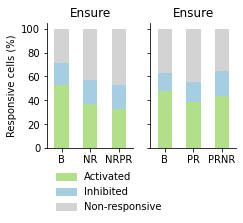

In [262]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_resp_NR[3:7].plot(kind='bar', stacked=True, ax=ax[0], color=colors)


df_resp_PR[3:6].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)

    
ax[1].set_title('Ensure')
ax[0].set_title('Ensure')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

ax[0].set_xticklabels(['B', 'NR', 'NRPR'], rotation=0)
ax[1].set_xticklabels(['B', 'PR', 'PRNR'], rotation=0)


# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.35))


ax[0].spines["top"].set_visible(False)

f.savefig("..//output//Stack_ensure2.png")

### Proportions activated cells per animal

In [149]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])

    
df_activated

,animal,diet,session,solution,lick_activated
VGP118,VGP118,PR,B1,Baseline,50.000000
VGP118,VGP118,PR,B2,Baseline,48.148148
VGP118,VGP118,PR,B3,Baseline,75.000000
VGP118,VGP118,PR,E1,Ensure,65.714286
VGP118,VGP118,PR,E2,Ensure,48.571429
...,...,...,...,...,...
VGP509,VGP509,PR,E1,Ensure,76.086957
VGP509,VGP509,PR,E2,Ensure,84.615385
VGP509,VGP509,PR,E3,Ensure,67.567568
VGP509,VGP509,PRNR,E5,Ensure,84.000000


In [167]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"B3": "float", "E3": "float","E6": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
#              .assign(pref1=lambda df_: df_.B3 - df_.E3)
#            .assign(pref2=lambda df_: df_.E3 - df_.E6)

           
          )



In [168]:
df_pref

session             B1         B2         B3         E1         E2         E3  \
animal diet                                                                     
VGP118 PR    50.000000  48.148148  75.000000  65.714286  48.571429  54.166667   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP202 NR    47.619048  76.470588  79.487179  51.219512  45.945946  53.333333   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP203 PR    68.965517  64.285714  64.444444  59.259259  49.152542  66.071429   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP204 NR    11.627907  26.923077  37.500000  35.000000  66.666667  72.727273   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP302 PR    65.217391  75.247525  72.727273  39.189189  78.666667  66.666667   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP306 PR    40.909091  34.285714  53.125000  32.258065  50.000000  44.444444   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP307 PR    54.545455  37.037037  50.000000   5.882353  54.166667  42.307692   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP310 NR    67.741935  79.687500  68.253968  51.785714  29.230769  54.166667   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP402 PR    25.000000  34.285714  43.750000  19.230769  30.000000  31.111111   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP403 NR          NaN  54.761905  75.000000  52.631579  56.410256  67.500000   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP404 NR    31.428571  43.750000  56.250000  44.736842  50.000000  67.647059   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP501 NR    67.391304  59.615385  80.952381  75.000000  64.102564  55.000000   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP502 NR    38.461538  68.000000  62.162162  66.666667  69.767442  50.000000   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP503 NR    34.615385  55.555556  73.529412  34.482759  51.515152  60.606061   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP504 NR    72.727273  78.000000  75.555556  42.857143  78.260870  44.444444   
       NRPR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP505 PR    61.363636  76.086957  81.250000  71.929825  52.542373  60.000000   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP506 PR    59.090909  62.068966  39.130435  46.153846  27.586207  42.307692   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   
VGP509 PR    80.000000  91.176471  68.421053  76.086957  84.615385  67.567568   
       PRNR        NaN        NaN        NaN        NaN        NaN        NaN   

session             E4         E5         E6  
animal diet                                   
VGP118 PR          NaN        NaN        NaN  
       PRNR  73.684211  46.153846  56.250000  
VGP202 NR          NaN        NaN        NaN  
       NRPR  62.222222  47.826087  55.882353  
VGP203 PR          NaN        NaN        NaN  
       PRNR  40.816327        NaN  54.838710  
VGP204 NR          NaN        NaN        NaN  
       NRPR  82.608696  43.589744  43.333333  
VGP302 PR          NaN        NaN        NaN  
       PRNR  44.871795        NaN  85.714286  
VGP306 PR          NaN        NaN        NaN  
       PRNR  61.538462  26.923077  76.190476  
VGP307 PR          NaN        NaN        NaN  
       PRNR  15.384615   9.090909  18.181818  
VGP310 NR          NaN        NaN        NaN  
       NRPR  46.153846  54.794521  67.692308  
VGP402 PR          NaN        NaN        NaN  
       PRNR  51.612903  27.7

In [273]:
# Making dataframe for NR-NRPR group
df_NR_base = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="B3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NR_ensure = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="E3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR_ensure = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="E6")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)


# Making dataframe for PR-PRNR group
df_PR_base = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="B3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)

df_PR_ensure = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="E3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR_ensure = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="E6")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)


# df_PRNR_malt = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="M6")
# #  .fillna(0)
#  .assign(PRNR=lambda df_:df_.PRNR)
#  .drop(columns=["NRPR"])
#  .dropna()
# )
# # print(df_NR)
# # print(df_PR)


NR_base=[]
for row in df_NR_base.iterrows():
    NR_base.append(row[1].NR)
    
NR_ensure=[]
for row in df_NR_ensure.iterrows():
    NR_ensure.append(row[1].NR)

    
NRPR_ensure=[]
for row in df_NRPR_ensure.iterrows():
    NRPR_ensure.append(row[1].NRPR)
    

    
PR_base=[]
for row in df_PR_base.iterrows():
    PR_base.append(row[1].PR)
    
PR_ensure=[]
for row in df_PR_ensure.iterrows():
    PR_ensure.append(row[1].PR)
    

    
PRNR_ensure=[]
for row in df_PRNR_ensure.iterrows():
    PRNR_ensure.append(row[1].PRNR)
        
    
PRNR_ensure

[56.25,
 54.83870967741935,
 85.71428571428571,
 76.19047619047619,
 18.181818181818183,
 32.35294117647059,
 85.71428571428571,
 41.46341463414634]

Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.


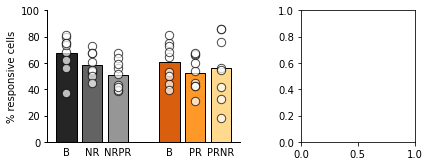

In [279]:
f, ax = plt.subplots(figsize=(6,2.5),ncols=2, sharey=False,gridspec_kw={"width_ratios": [1.7,1]})
f.subplots_adjust(wspace=0.4,hspace=0.2, bottom=0.15, left=0.1, right=0.95)

colors_C=['#252525', '#636363','#969696','#d95f0e','#fe9929','#fed98e','#af8dc3','#7fbf7b']


tp.barscatter([[NR_base,NR_ensure,NRPR_ensure],[PR_base,PR_ensure,PRNR_ensure]], 
#               paired= True,
              barfacecolor=colors_C,
              barlabels=['B','NR','NRPR','B','PR','PRNR'],
              barlabeloffset=0.04,
              barfacecolor_option='individual',
              fontsize = 10,
              scattersize=70,
              scatteralpha=0.7,
              spaced=True,
              linewidth=1,
              ax=ax[0])

ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_ylabel("% responsive cells")



f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%activated cells ensure.png')

In [191]:
tp.barscatter?

Signature:
tp.barscatter(
    data_in,
    ax=[],
    transpose=False,
    paired=False,
    spaced=False,
    xspace=0.1,
    yspace=20,
    groupwidth=0.75,
    barwidth=0.8,
    barfacecolor_option='same',
    barfacecolor=['white'],
    baredgecolor_option='same',
    baredgecolor=['black'],
    errorbars=False,
    scatteroffset=0,
    scatterfacecolor_option='same',
    scatterfacecolor=['white'],
    scatteredgecolor_option='same',
    scatteredgecolor=['black'],
    scatterlinecolor='grey',
    linewidth=0.75,
    scattersize=80,
    grouplabel=[],
    grouplabeloffset=0,
    barlabels=[],
    barlabeloffset=0.025,
    itemlabels=[],
    show_legend=False,
    legendloc='upper right',
    fontsize=10,
    bar_kwargs={},
    sc_kwargs={'alpha': 0.7, 'linewidth': 1, 'zorder': 20, 'clip_on': False},
    ax_kwargs={},
    **extra_kwargs,
)
Docstring: <no docstring>
File:      c:\users\mko102\anaconda3\lib\site-packages\trompy\barscatter.py
Type:      function


## Perference 

In [ ]:
# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    
    


In [ ]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

## Proportion of cells responsive to Cas/malt

In [ ]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



In [ ]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





In [ ]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?